In [7]:
import torch, matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [8]:
# Load MNIST data: 28×28 grayscale digits
transform = transforms.ToTensor()
train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

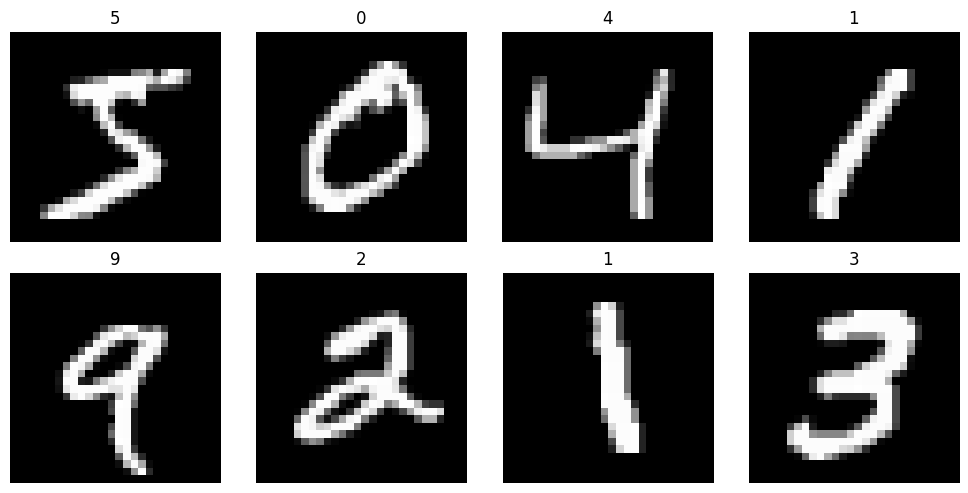

In [9]:
# quick visual check
fig, axs = plt.subplots(2, 4, figsize=(10,5))
axes = axs.flatten()

for i in range(len(axes)):
    img, y = train[i]
    axes[i].imshow(img.squeeze(0), cmap="gray")
    axes[i].set_title(y); axes[i].axis("off")

plt.tight_layout()
plt.show()

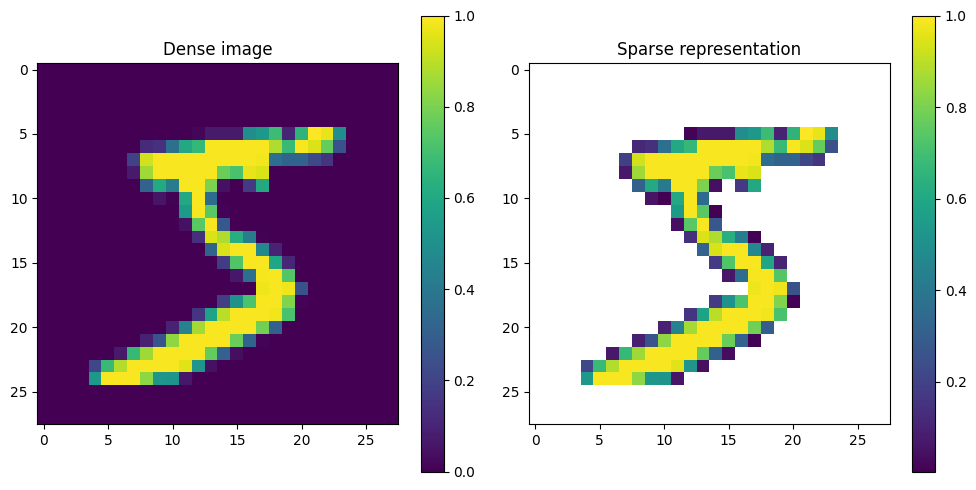

In [17]:
from warpconvnet.geometry.types.voxels import Voxels
import numpy as np

img, label = train[0]        # [1, 28, 28]

dense = img.unsqueeze(0)     # [1, 1, 28, 28]
dense_img = dense[0, 0].cpu().numpy()

vox = Voxels.from_dense(dense)
# WarpConvNet uses:
#   indices:  [N, 2] = (batch, x, y)
#   values:   [N, 1] = features (pixel intensities)
coords = vox.batch_indexed_coordinates.cpu().numpy()    
feats  = vox.batched_features.batched_tensor.cpu().numpy()[:, 0] 

sparse_img = np.full((28, 28), np.nan, dtype=float)
for (b, h, w), val in zip(coords, feats):
    sparse_img[h, w] = val

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im0 = axs[0].imshow(dense_img, cmap="viridis")
axs[0].set_title("Dense image")
fig.colorbar(im0, ax=axs[0])

im1 = plt.imshow(sparse_img, cmap="viridis")
axs[1].set_title("Sparse representation")
fig.colorbar(im1, ax=axs[1])

plt.tight_layout()
plt.show()